[[-2100 -3976 -3773]
 [-2100 -3976 -3773]
 [-2103 -3976 -3752]
 ...
 [-2772 -4033    81]
 [-2776 -4033   101]
 [-2776 -4033   101]]
(384, 3)


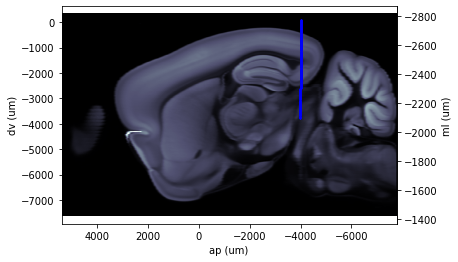

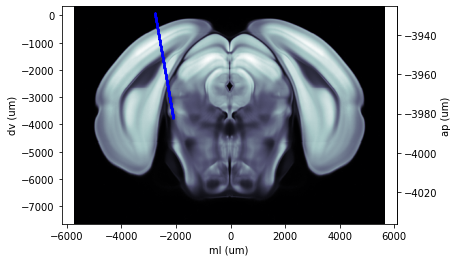

In [76]:
import ibllib.atlas.plots

#help(ibllib.atlas.atlas)

from ibllib.atlas import atlas as at
from one.api import ONE
import numpy as np

atlas=at.AllenAtlas()

one = ONE(base_url='https://openalyx.internationalbrainlab.org', password='international', silent=True)
eid = '58b1e920-cfc8-467e-b28b-7654a55d0977'
mlapdv = one.load_dataset(eid, 'alf/probe00/pykilosort/channels.mlapdv.npy')
print(mlapdv)
xyz=np.c_[mlapdv[:,0].astype(np.float64) / 1e6, mlapdv[:,1].astype(np.float64) / 1e6, mlapdv[:,2].astype(np.float64) / 1e6]
plt=atlas.plot_tilted_slice(xyz,0)
plt.scatter(mlapdv[:,1],mlapdv[:,2],c='b',s=1)
plt=atlas.plot_tilted_slice(xyz,1)
plt.scatter(mlapdv[:,0],mlapdv[:,2],c='b',s=1)
print(mlapdv.shape)

In [59]:
help(at.AllenAtlas)

Help on class AllenAtlas in module ibllib.atlas.atlas:

class AllenAtlas(BrainAtlas)
 |  AllenAtlas(res_um=25, scaling=array([1, 1, 1]), mock=False, hist_path=None)
 |  
 |  Instantiates an atlas.BrainAtlas corresponding to the Allen CCF at the given resolution
 |  using the IBL Bregma and coordinate system
 |  
 |  Method resolution order:
 |      AllenAtlas
 |      BrainAtlas
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, res_um=25, scaling=array([1, 1, 1]), mock=False, hist_path=None)
 |      :param res_um: 10, 25 or 50 um
 |      :param scaling: scale factor along ml, ap, dv for squeeze and stretch ([1, 1, 1])
 |      :param mock: for testing purpose
 |      :param hist_path
 |      :return: atlas.BrainAtlas
 |  
 |  ccf2xyz(self, ccf, ccf_order='mlapdv')
 |      Converts coordinates from the CCF coordinates, which is assumed to be the cube indices
 |      times the spacing.
 |      :param ccf coordinates in CCF space in um, origin is the front left 

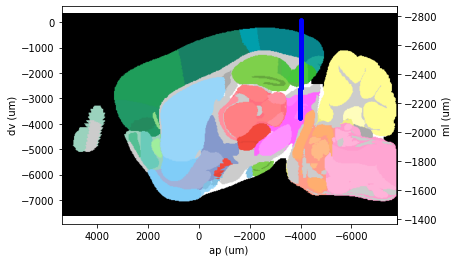

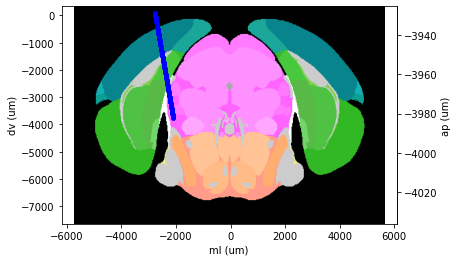

In [78]:
plt=atlas.plot_tilted_slice(xyz,0,volume="annotation")
plt.scatter(mlapdv[:,1],mlapdv[:,2],c='b',s=10)
plt=atlas.plot_tilted_slice(xyz,1,volume="annotation")
plt.scatter(mlapdv[:,0],mlapdv[:,2],c='b',s=10)

In [80]:
fit=at.Trajectory.fit(xyz)
proj=fit.project(xyz)

In [82]:
proj

array([[-2.09808954e-03, -3.97914393e-03, -3.77270885e-03],
       [-2.09808954e-03, -3.97914393e-03, -3.77270885e-03],
       [-2.10174945e-03, -3.97943429e-03, -3.75182856e-03],
       ...,
       [-2.77352486e-03, -4.03273034e-03,  8.07364718e-05],
       [-2.77704455e-03, -4.03300958e-03,  1.00816777e-04],
       [-2.77704455e-03, -4.03300958e-03,  1.00816777e-04]])

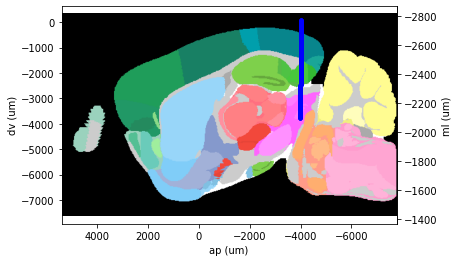

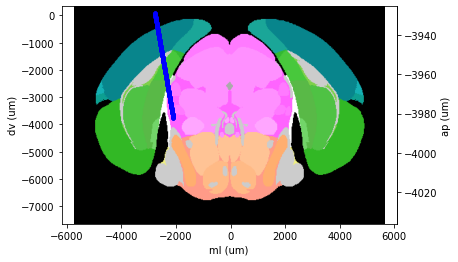

In [85]:
plt=atlas.plot_tilted_slice(xyz,0,volume="annotation")
plt.scatter(proj[:,1]*1e6,proj[:,2]*1e6,c='b',s=10)
plt=atlas.plot_tilted_slice(xyz,1,volume="annotation")
plt.scatter(proj[:,0]*1e6,proj[:,2]*1e6,c='b',s=10)